<a href="https://colab.research.google.com/github/SudiWafula/DATA-ANALYTICS-CAPSTONE-PROJECT/blob/main/BPNN/ANN%20Model%20Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the relevant libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import random
import cv2
from skimage.transform import resize
import pickle

In [4]:
file_path = '/content/drive/MyDrive/crop_resized_images.pkl'

with open(file_path, 'rb') as file:
    X_array = pickle.load(file)

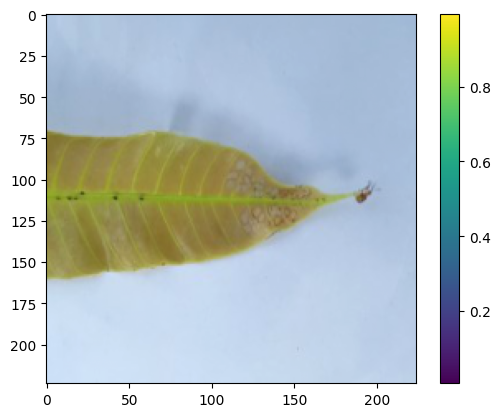

In [5]:
plt.figure()
plt.imshow(X_array[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
import pickle

file_path = '/content/drive/My Drive/y_array.pkl'

with open(file_path, 'rb') as f:
    y_array = pickle.load(f)


In [7]:
train_images, test_images, train_labels, test_labels = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from keras.layers import Dropout


In [9]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 37.8 gigabytes of available RAM

You are using a high-RAM runtime!


**SEQUENTIAL MODEL COMPILATION PER STAGE**

**STAGE 1:** BACKPROPAGATION NEURAL NETWORK (BPNN)

In [10]:

# Define your image and training parameters
image_height = 224
image_width = 224
num_channels = 3
num_classes = 8
num_epochs = 30
batch_size = 15

model = Sequential()

model.add(Flatten(input_shape=(image_height, image_width, num_channels)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

class PrintAccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy') * 100
        print(f'Epoch {epoch + 1}, Accuracy: {accuracy:.2f}%')

callbacks = [PrintAccuracyCallback()]

model.summary()

bpnn1 = model.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, callbacks=callbacks)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 32)                4816928   
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
Total params: 4,817,192
Trainable params: 4,817,192
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
171/171 [==============================] - 5s 23ms/step - loss: 4.9290 - accuracy: 0.1281 - val_loss: 2.0791 - val_accuracy: 0.1297
Epoch 2/30
171/171 [==============================] - 3s 19ms/step - loss: 2.0796 - accuracy: 0.1238 - val_loss: 2.0794 - val_accuracy: 0.1297
Epoch 3/30
171/171 [====

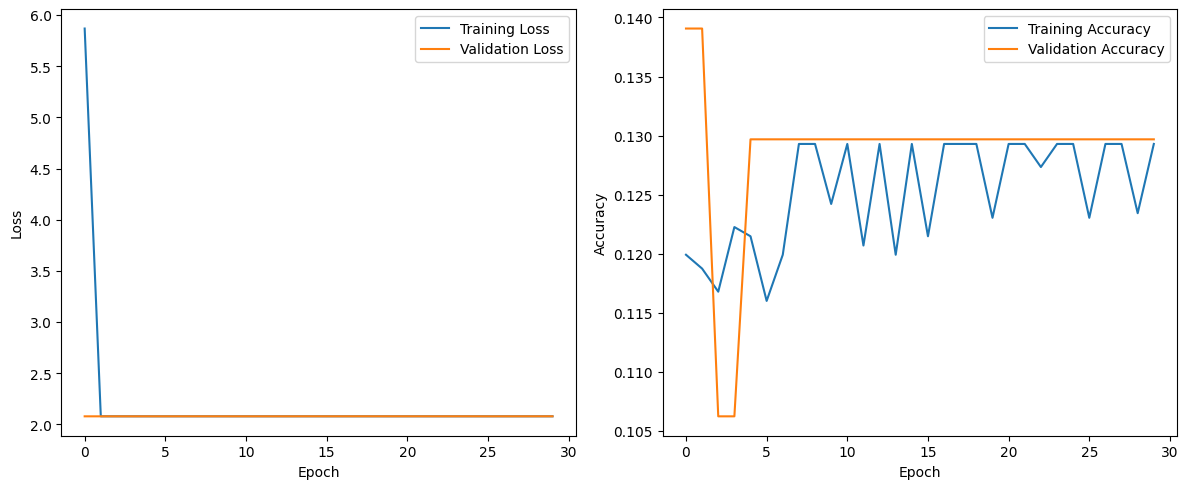

25/25 [==============================] - 0s 4ms/step


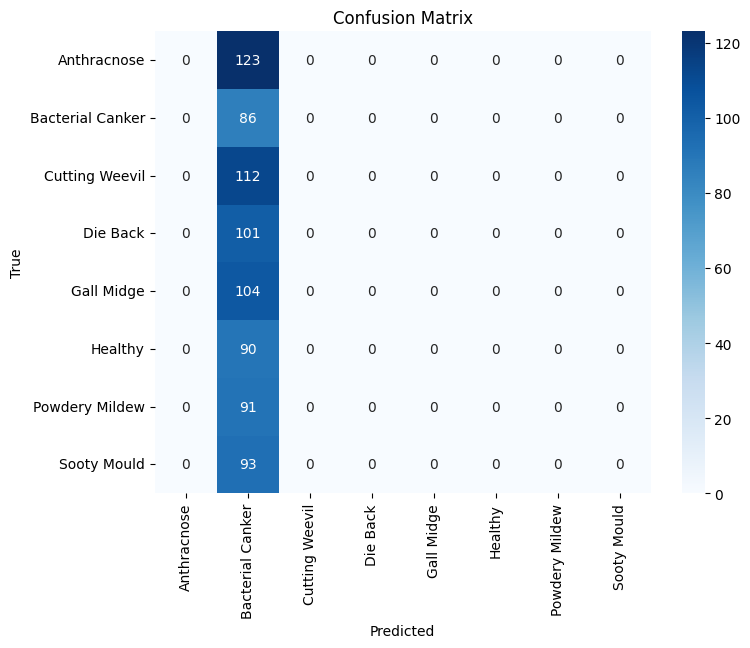

In [11]:
# training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(bpnn1.history['loss'], label='Training Loss')
plt.plot(bpnn1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(bpnn1.history['accuracy'], label='Training Accuracy')
plt.plot(bpnn1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

class_names = [
    "Anthracnose",
    "Bacterial Canker",
    "Cutting Weevil",
    "Die Back",
    "Gall Midge",
    "Healthy",
    "Powdery Mildew",
    "Sooty Mould"
]

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [12]:
test_labels_one_hot = to_categorical(test_labels, num_classes)

predicted_probabilities = model.predict(test_images)

roc_curves = []
auc_scores = []

for class_index in range(num_classes):
    fpr, tpr, _ = roc_curve(test_labels_one_hot[:, class_index], predicted_probabilities[:, class_index])
    roc_curves.append((fpr, tpr))
    auc_scores.append(auc(fpr, tpr))

25/25 [==============================] - 0s 3ms/step


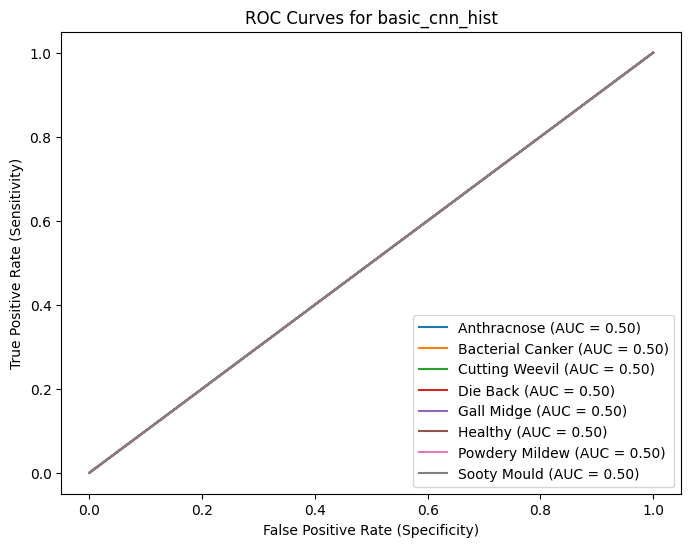

In [13]:
test_labels_one_hot = to_categorical(test_labels, num_classes)

predicted_probabilities = model.predict(test_images)

roc_curves = []
auc_scores = []

for class_index in range(num_classes):
    fpr, tpr, _ = roc_curve(test_labels_one_hot[:, class_index], predicted_probabilities[:, class_index])
    roc_curves.append((fpr, tpr))
    auc_scores.append(auc(fpr, tpr))

In [14]:
y_true = test_labels  # True labels
y_pred = predicted_probabilities.argmax(axis=1)  # Predicted labels

accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Accuracy: 0.11
Precision: 0.01
Recall: 0.12
F1-Score: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


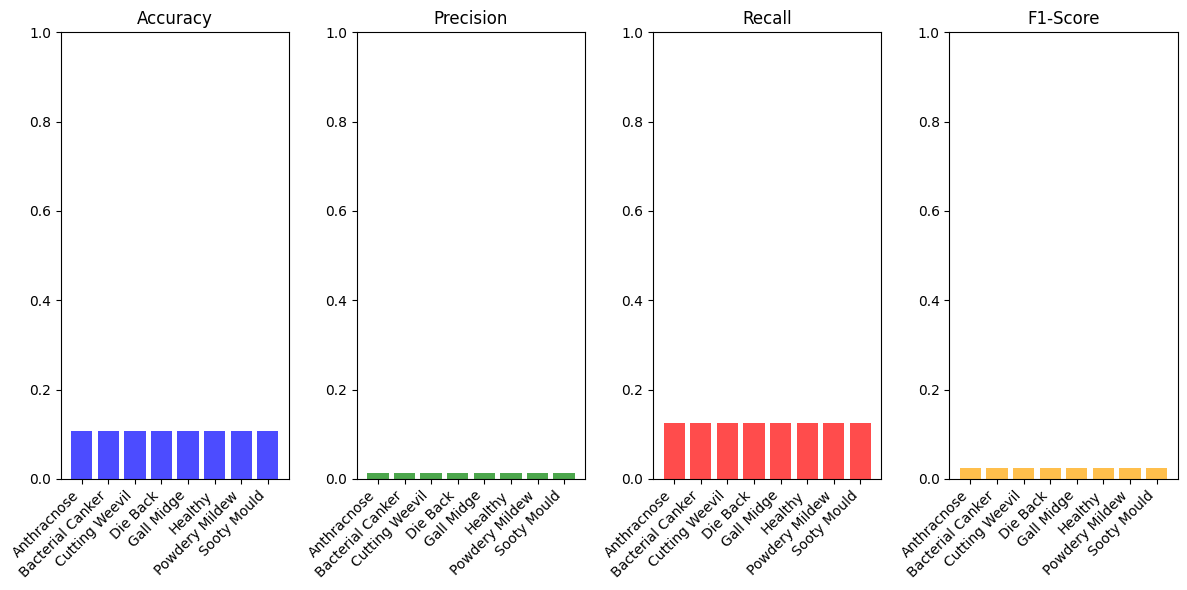

In [15]:
# metric values
accuracy_values = [accuracy]
precision_values = [precision]
recall_values = [recall]
f1_values = [f1]

# bar plots for accuracy, precision, recall, and F1-score
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.bar(class_names, accuracy_values, color='b', alpha=0.7)
plt.ylim([0, 1])
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 2)
plt.bar(class_names, precision_values, color='g', alpha=0.7)
plt.ylim([0, 1])
plt.title('Precision')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 3)
plt.bar(class_names, recall_values, color='r', alpha=0.7)
plt.ylim([0, 1])
plt.title('Recall')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 4)
plt.bar(class_names, f1_values, color='orange', alpha=0.7)
plt.ylim([0, 1])
plt.title('F1-Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [16]:
# a new model (model2) with an additional layer
model2 = Sequential()
model2.add(Flatten(input_shape=(image_height, image_width, num_channels)))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(64, activation='relu'))  # Additional layer with 64 units
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

class PrintAccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy') * 100
        print(f'Epoch {epoch + 1}, Accuracy: {accuracy:.2f}%')

callbacks = [PrintAccuracyCallback()]

model2.summary()

bpnn2 = model2.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, callbacks=callbacks)

test_loss, test_accuracy = model2.evaluate(test_images, test_labels)
print(f'Test accuracy for model2: {test_accuracy * 100:.2f}%')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 32)                4816928   
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
Total params: 4,819,560
Trainable params: 4,819,560
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
171/171 [==============================] - 5s 24ms/step - loss: 4.1127 - accuracy: 0.1316 - val_loss: 2.0791 - val_accuracy: 0.1312
Epoch 2/30
171/171 [=============

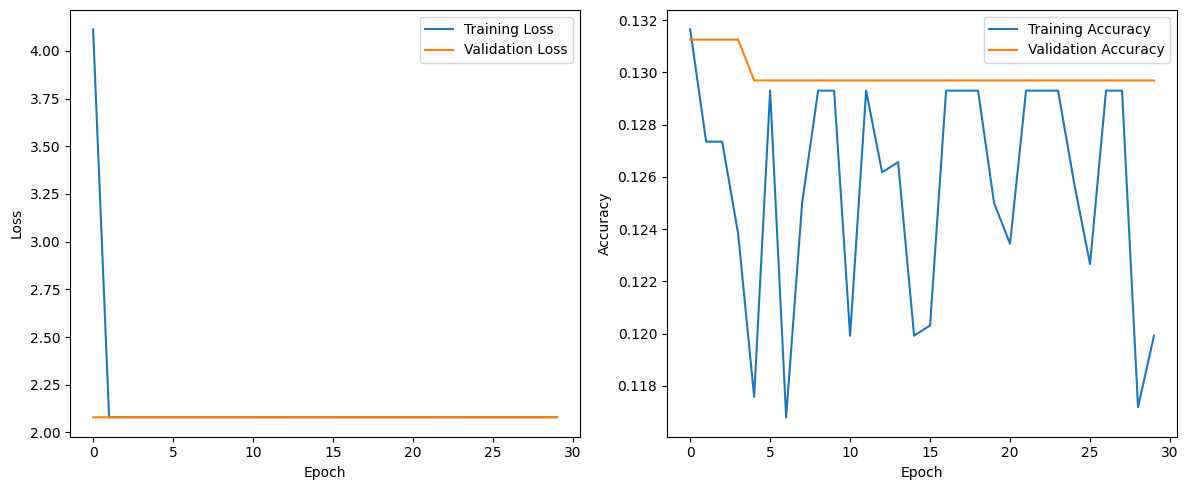

25/25 [==============================] - 0s 3ms/step


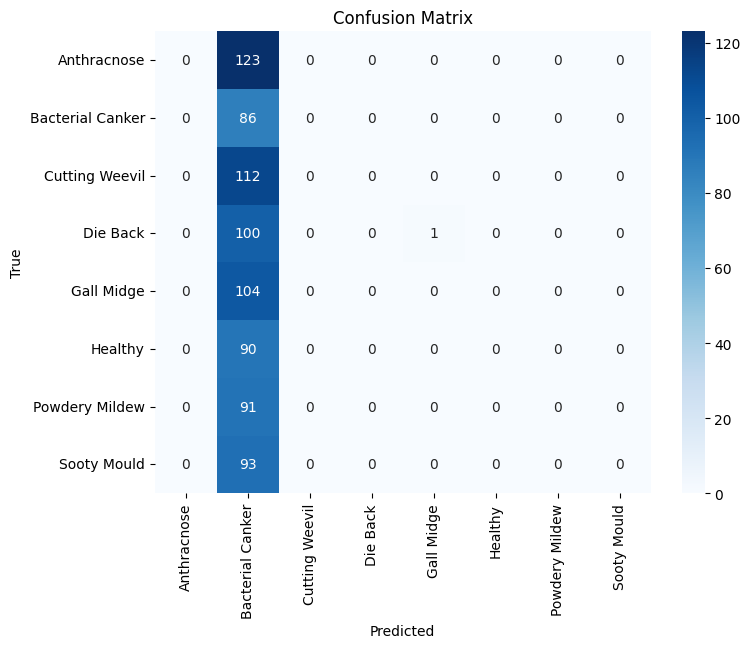

In [33]:
# training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(bpnn2.history['loss'], label='Training Loss')
plt.plot(bpnn2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(bpnn2.history['accuracy'], label='Training Accuracy')
plt.plot(bpnn2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

predictions = model2.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

class_names = [
    "Anthracnose",
    "Bacterial Canker",
    "Cutting Weevil",
    "Die Back",
    "Gall Midge",
    "Healthy",
    "Powdery Mildew",
    "Sooty Mould"
]

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [18]:
test_labels_one_hot2 = to_categorical(test_labels, num_classes)

predicted_probabilities2 = model2.predict(test_images)

roc_curves2 = []
auc_scores2 = []

for class_index in range(num_classes):
    fpr, tpr, _ = roc_curve(test_labels_one_hot2[:, class_index], predicted_probabilities2[:, class_index])
    roc_curves2.append((fpr, tpr))
    auc_scores2.append(auc(fpr, tpr))

25/25 [==============================] - 0s 3ms/step


In [19]:
y_true2 = test_labels  # True labels
y_pred2 = predicted_probabilities2.argmax(axis=1)  # Predicted labels

accuracy2 = accuracy_score(y_true2, y_pred2)
print(f'Accuracy: {accuracy2:.2f}')

precision2 = precision_score(y_true2, y_pred2, average='macro')
recall2 = recall_score(y_true2, y_pred2, average='macro')
f1_2 = f1_score(y_true2, y_pred2, average='macro')

print(f'Precision: {precision2:.2f}')
print(f'Recall: {recall2:.2f}')
print(f'F1-Score: {f1_2:.2f}')

Accuracy: 0.11
Precision: 0.01
Recall: 0.12
F1-Score: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


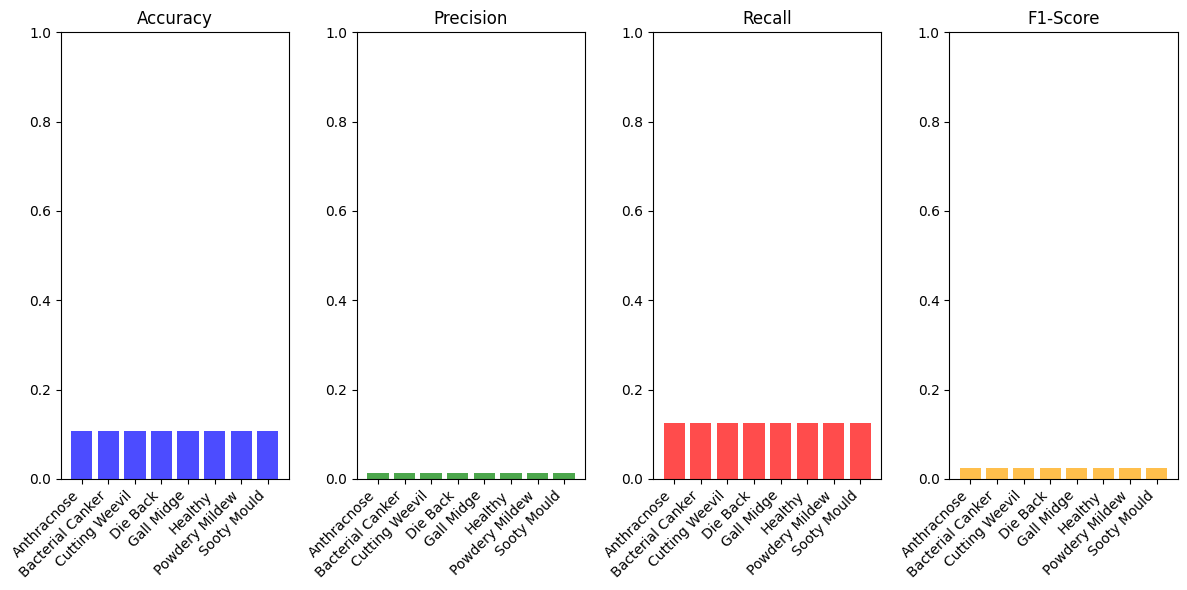

In [20]:
# metric values
accuracy_values = [accuracy2]
precision_values = [precision2]
recall_values = [recall2]
f1_values = [f1_2]

# bar plots for accuracy, precision, recall, and F1-score
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.bar(class_names, accuracy_values, color='b', alpha=0.7)
plt.ylim([0, 1])
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 2)
plt.bar(class_names, precision_values, color='g', alpha=0.7)
plt.ylim([0, 1])
plt.title('Precision')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 3)
plt.bar(class_names, recall_values, color='r', alpha=0.7)
plt.ylim([0, 1])
plt.title('Recall')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 4)
plt.bar(class_names, f1_values, color='orange', alpha=0.7)
plt.ylim([0, 1])
plt.title('F1-Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [21]:

# Create model3
model3 = Sequential()
model3.add(Flatten(input_shape=(image_height, image_width, num_channels)))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(128, activation='relu'))  # Additional layer with 128 units
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callback to print accuracy
class PrintAccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy') * 100
        print(f'Epoch {epoch + 1}, Accuracy: {accuracy:.2f}%')

callbacks = [PrintAccuracyCallback()]

model3.summary()

bpnn3 = model3.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, callbacks=callbacks)

test_loss, test_accuracy = model3.evaluate(test_images, test_labels)
print(f'Test accuracy for model3: {test_accuracy * 100:.2f}%')


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 32)                4816928   
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 4,828,392
Trainable params: 4,828,392
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
171/171 [========================

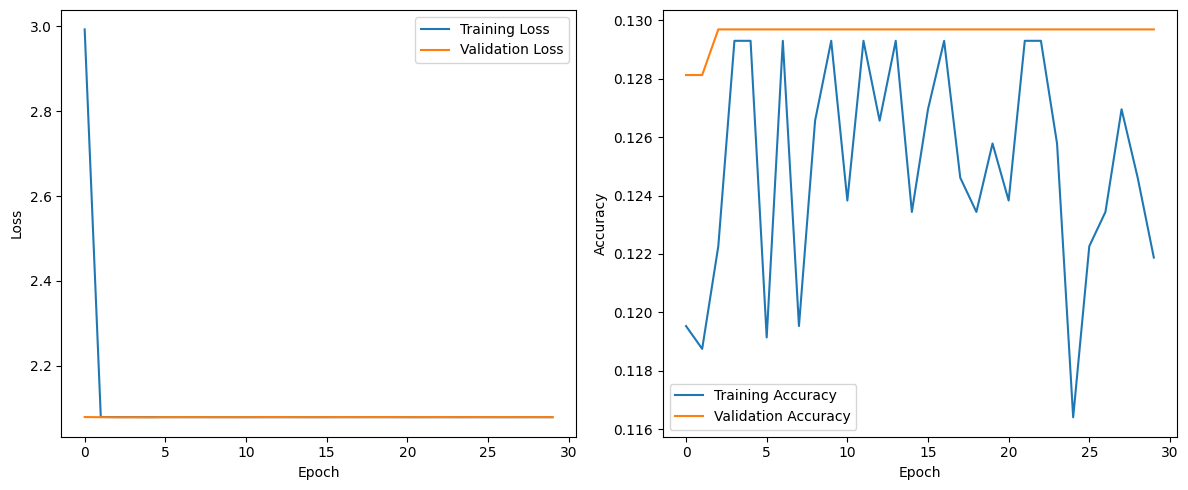

25/25 [==============================] - 0s 3ms/step


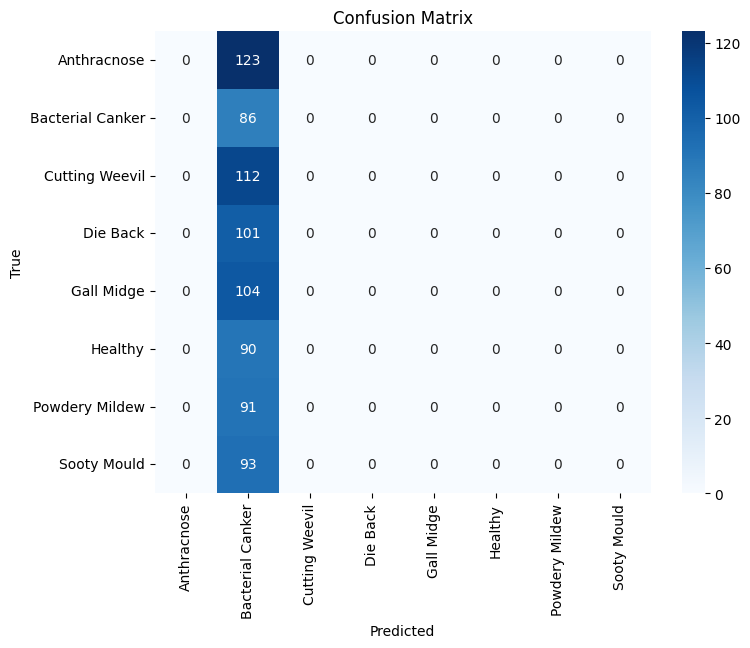

In [32]:
# training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(bpnn3.history['loss'], label='Training Loss')
plt.plot(bpnn3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(bpnn3.history['accuracy'], label='Training Accuracy')
plt.plot(bpnn3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

predictions = model3.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

class_names = [
    "Anthracnose",
    "Bacterial Canker",
    "Cutting Weevil",
    "Die Back",
    "Gall Midge",
    "Healthy",
    "Powdery Mildew",
    "Sooty Mould"
]

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [23]:
test_labels_one_hot3 = to_categorical(test_labels, num_classes)

predicted_probabilities3 = model3.predict(test_images)

roc_curves3 = []
auc_scores3 = []

for class_index in range(num_classes):
    fpr, tpr, _ = roc_curve(test_labels_one_hot3[:, class_index], predicted_probabilities3[:, class_index])
    roc_curves3.append((fpr, tpr))
    auc_scores3.append(auc(fpr, tpr))

25/25 [==============================] - 0s 4ms/step


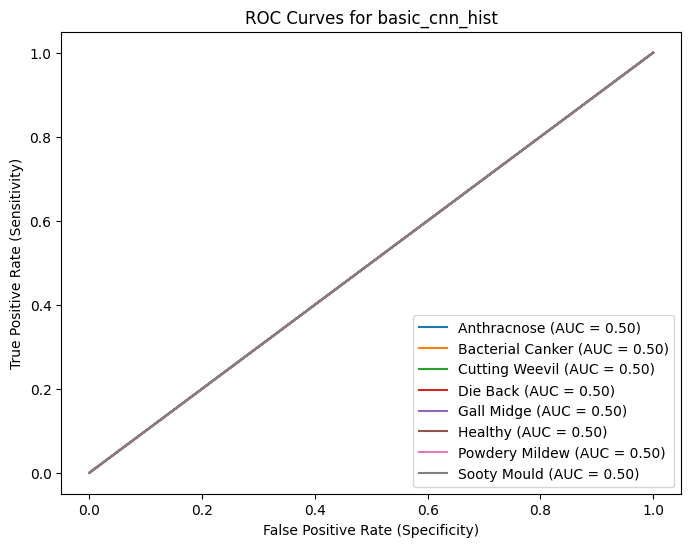

In [24]:
plt.figure(figsize=(8, 6))

for class_index in range(num_classes):
    fpr, tpr = roc_curves3[class_index]
    auc_score3 = auc(fpr, tpr)

    label = f'{class_names[class_index]} (AUC = {auc_score3:.2f})'

    plt.plot(fpr, tpr, label=label)

plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves for basic_cnn_hist')
plt.legend(loc='lower right')

plt.show()

In [25]:
y_true3 = test_labels  # True labels
y_pred3 = predicted_probabilities3.argmax(axis=1)  # Predicted labels

accuracy3 = accuracy_score(y_true3, y_pred3)
print(f'Accuracy: {accuracy3:.2f}')

precision3 = precision_score(y_true3, y_pred3, average='macro')
recall3 = recall_score(y_true3, y_pred3, average='macro')
f1_3 = f1_score(y_true3, y_pred3, average='macro')

print(f'Precision: {precision3:.2f}')
print(f'Recall: {recall3:.2f}')
print(f'F1-Score: {f1_3:.2f}')

Accuracy: 0.11
Precision: 0.01
Recall: 0.12
F1-Score: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


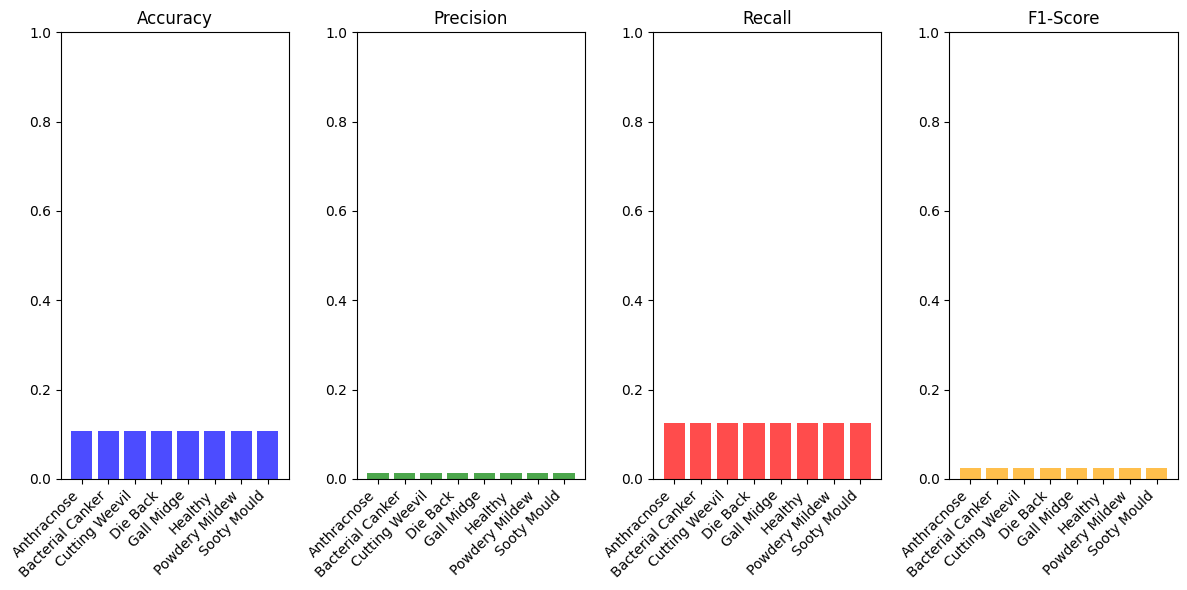

In [26]:
# metric values
accuracy_values = [accuracy3]
precision_values = [precision3]
recall_values = [recall3]
f1_values = [f1_3]

# bar plots for accuracy, precision, recall, and F1-score
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.bar(class_names, accuracy_values, color='b', alpha=0.7)
plt.ylim([0, 1])
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 2)
plt.bar(class_names, precision_values, color='g', alpha=0.7)
plt.ylim([0, 1])
plt.title('Precision')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 3)
plt.bar(class_names, recall_values, color='r', alpha=0.7)
plt.ylim([0, 1])
plt.title('Recall')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 4)
plt.bar(class_names, f1_values, color='orange', alpha=0.7)
plt.ylim([0, 1])
plt.title('F1-Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [27]:
# Create model4
model4 = Sequential()
model4.add(Flatten(input_shape=(image_height, image_width, num_channels)))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(128, activation='relu'))  # Additional layer with 128 units
model4.add(Dense(128, activation='relu'))  # Another layer with 128 units
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

class PrintAccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy') * 100
        print(f'Epoch {epoch + 1}, Accuracy: {accuracy:.2f}%')

callbacks = [PrintAccuracyCallback()]

model4.summary()

bpnn4 = model4.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, callbacks=callbacks)

test_loss, test_accuracy = model4.evaluate(test_images, test_labels)
print(f'Test accuracy for model4: {test_accuracy * 100:.2f}%')


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_9 (Dense)             (None, 32)                4816928   
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 4,844,904
Trainable params: 4,844,904
No

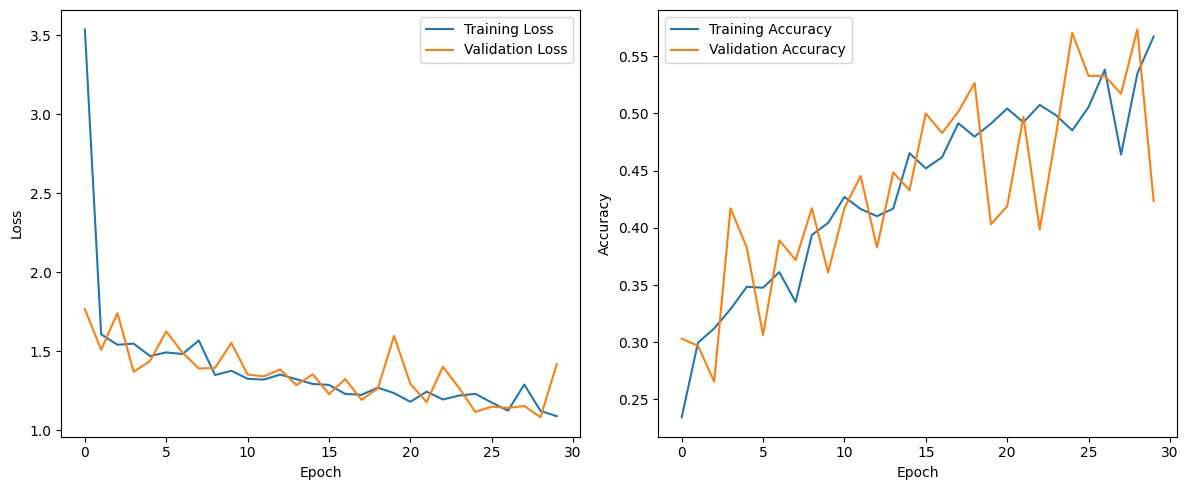

25/25 [==============================] - 0s 5ms/step


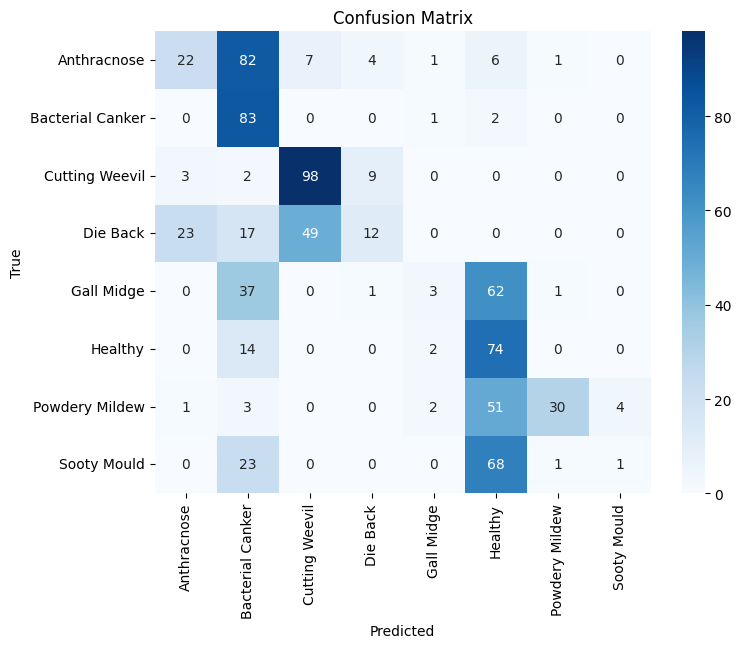

In [31]:
# training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(bpnn4.history['loss'], label='Training Loss')
plt.plot(bpnn4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(bpnn4.history['accuracy'], label='Training Accuracy')
plt.plot(bpnn4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

predictions = model4.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

class_names = [
    "Anthracnose",
    "Bacterial Canker",
    "Cutting Weevil",
    "Die Back",
    "Gall Midge",
    "Healthy",
    "Powdery Mildew",
    "Sooty Mould"
]

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [29]:
test_labels_one_hot4 = to_categorical(test_labels, num_classes)

predicted_probabilities4 = model4.predict(test_images)

roc_curves4 = []
auc_scores4 = []

for class_index in range(num_classes):
    fpr, tpr, _ = roc_curve(test_labels_one_hot4[:, class_index], predicted_probabilities4[:, class_index])
    roc_curves4.append((fpr, tpr))
    auc_scores4.append(auc(fpr, tpr))

25/25 [==============================] - 0s 3ms/step


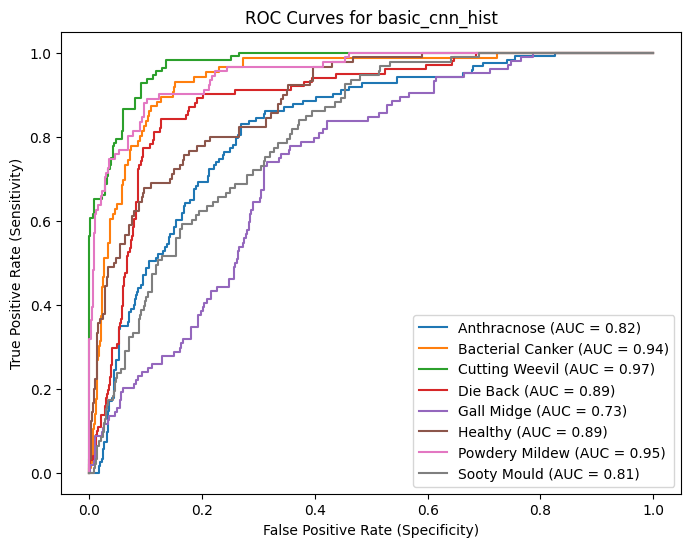

In [30]:
plt.figure(figsize=(8, 6))

for class_index in range(num_classes):
    fpr, tpr = roc_curves4[class_index]
    auc_score4 = auc(fpr, tpr)

    label = f'{class_names[class_index]} (AUC = {auc_score4:.2f})'

    plt.plot(fpr, tpr, label=label)

plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves for basic_cnn_hist')
plt.legend(loc='lower right')

plt.show()

In [35]:
# Create model5
model5 = Sequential()
model5.add(Flatten(input_shape=(image_height, image_width, num_channels)))
model5.add(Dense(32, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(128, activation='relu'))  # Additional layer with 128 units
model5.add(Dense(128, activation='relu'))  # Another layer with 128 units
model5.add(Dropout(0.5))  # Dropout layer with a rate of 0.5
model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

class PrintAccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy') * 100
        print(f'Epoch {epoch + 1}, Accuracy: {accuracy:.2f}%')

callbacks = [PrintAccuracyCallback()]

model5.summary()

bpnn5 = model5.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, callbacks=callbacks)

test_loss, test_accuracy = model5.evaluate(test_images, test_labels)
print(f'Test accuracy for model5: {test_accuracy * 100:.2f}%')


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_14 (Dense)            (None, 32)                4816928   
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 8)                

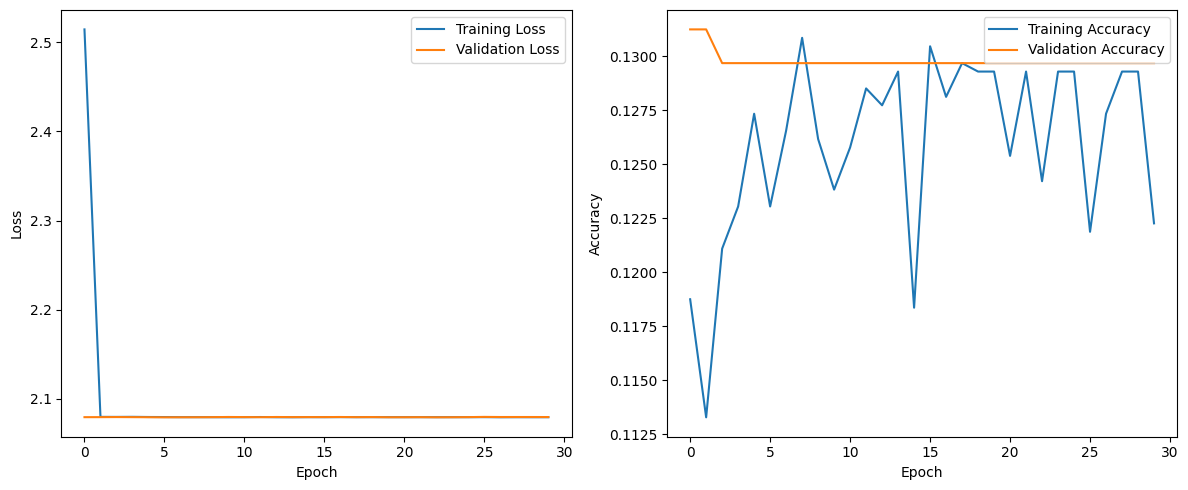

25/25 [==============================] - 0s 3ms/step


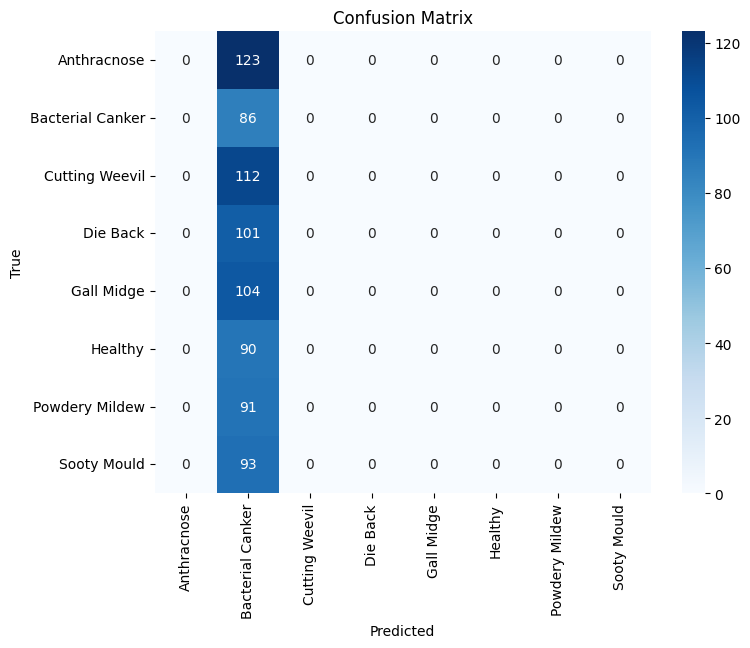

In [36]:
# training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(bpnn5.history['loss'], label='Training Loss')
plt.plot(bpnn5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(bpnn5.history['accuracy'], label='Training Accuracy')
plt.plot(bpnn5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

predictions = model5.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

class_names = [
    "Anthracnose",
    "Bacterial Canker",
    "Cutting Weevil",
    "Die Back",
    "Gall Midge",
    "Healthy",
    "Powdery Mildew",
    "Sooty Mould"
]

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [37]:
test_labels_one_hot5 = to_categorical(test_labels, num_classes)

predicted_probabilities5 = model5.predict(test_images)

roc_curves5 = []
auc_scores5 = []

for class_index in range(num_classes):
    fpr, tpr, _ = roc_curve(test_labels_one_hot5[:, class_index], predicted_probabilities5[:, class_index])
    roc_curves5.append((fpr, tpr))
    auc_scores5.append(auc(fpr, tpr))

25/25 [==============================] - 0s 3ms/step


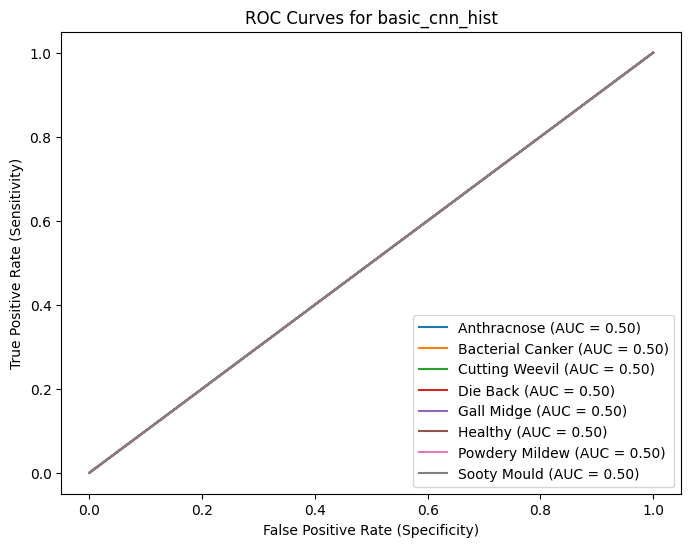

In [38]:

plt.figure(figsize=(8, 6))

for class_index in range(num_classes):
    fpr, tpr = roc_curves5[class_index]
    auc_score5 = auc(fpr, tpr)

    label = f'{class_names[class_index]} (AUC = {auc_score5:.2f})'

    plt.plot(fpr, tpr, label=label)

plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves for basic_cnn_hist')
plt.legend(loc='lower right')

plt.show()

In [39]:
y_true5 = test_labels  # True labels
y_pred5 = predicted_probabilities5.argmax(axis=1)  # Predicted labels

accuracy5 = accuracy_score(y_true5, y_pred5)
print(f'Accuracy: {accuracy5:.2f}')

precision5 = precision_score(y_true5, y_pred5, average='macro')
recall5 = recall_score(y_true5, y_pred5, average='macro')
f1_5 = f1_score(y_true5, y_pred5, average='macro')

print(f'Precision: {precision5:.2f}')
print(f'Recall: {recall5:.2f}')
print(f'F1-Score: {f1_5:.2f}')

Accuracy: 0.11
Precision: 0.01
Recall: 0.12
F1-Score: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


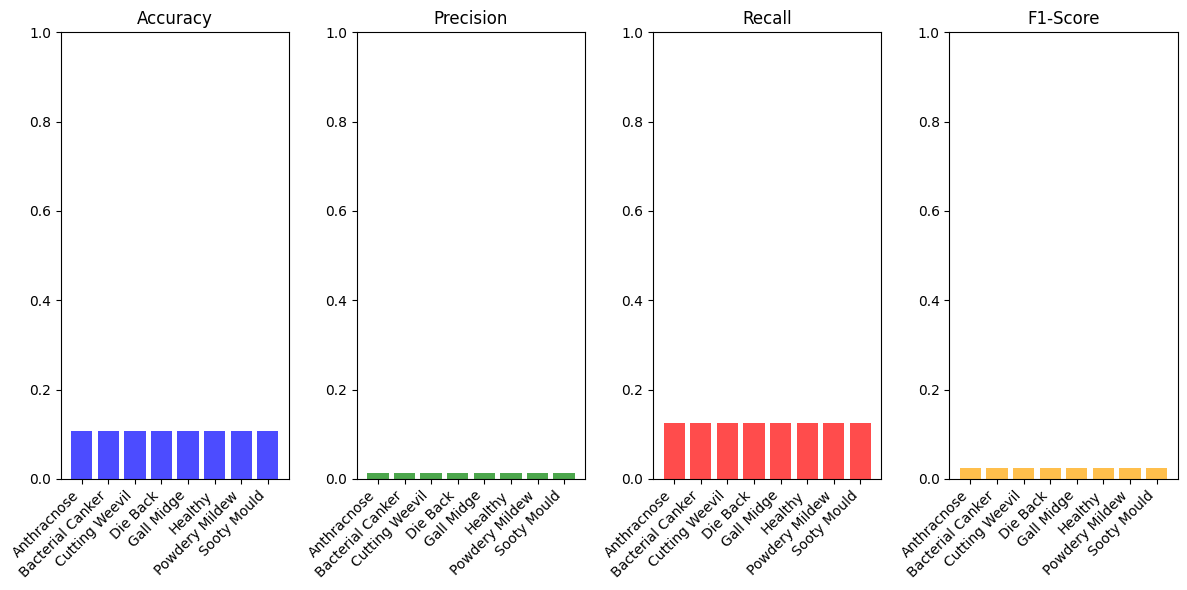

In [40]:
# metric values
accuracy_values = [accuracy5]
precision_values = [precision5]
recall_values = [recall5]
f1_values = [f1_5]

# bar plots for accuracy, precision, recall, and F1-score
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.bar(class_names, accuracy_values, color='b', alpha=0.7)
plt.ylim([0, 1])
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 2)
plt.bar(class_names, precision_values, color='g', alpha=0.7)
plt.ylim([0, 1])
plt.title('Precision')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 3)
plt.bar(class_names, recall_values, color='r', alpha=0.7)
plt.ylim([0, 1])
plt.title('Recall')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 4)
plt.bar(class_names, f1_values, color='orange', alpha=0.7)
plt.ylim([0, 1])
plt.title('F1-Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [42]:
# Create model6 with a custom learning rate
custom_learning_rate = 0.001  # Your desired learning rate

model6 = Sequential()
model6.add(Flatten(input_shape=(image_height, image_width, num_channels)))
model6.add(Dense(32, activation='relu'))
model6.add(Dense(64, activation='relu'))
model6.add(Dense(128, activation='relu'))
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(learning_rate=custom_learning_rate)

model6.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

class PrintAccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy') * 100
        print(f'Epoch {epoch + 1}, Accuracy: {accuracy:.2f}%')

callbacks = [PrintAccuracyCallback()]

model6.summary()

bpnn6 = model6.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, callbacks=callbacks)

test_loss, test_accuracy = model6.evaluate(test_images, test_labels)
print(f'Test accuracy for model5: {test_accuracy * 100:.2f}%')


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_24 (Dense)            (None, 32)                4816928   
                                                                 
 dense_25 (Dense)            (None, 64)                2112      
                                                                 
 dense_26 (Dense)            (None, 128)               8320      
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 8)                

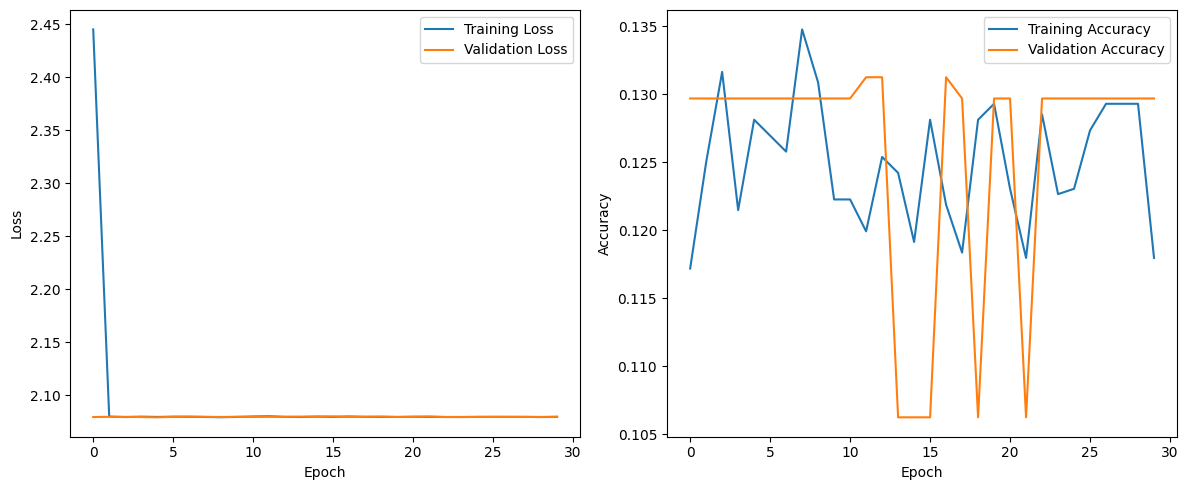

25/25 [==============================] - 0s 4ms/step


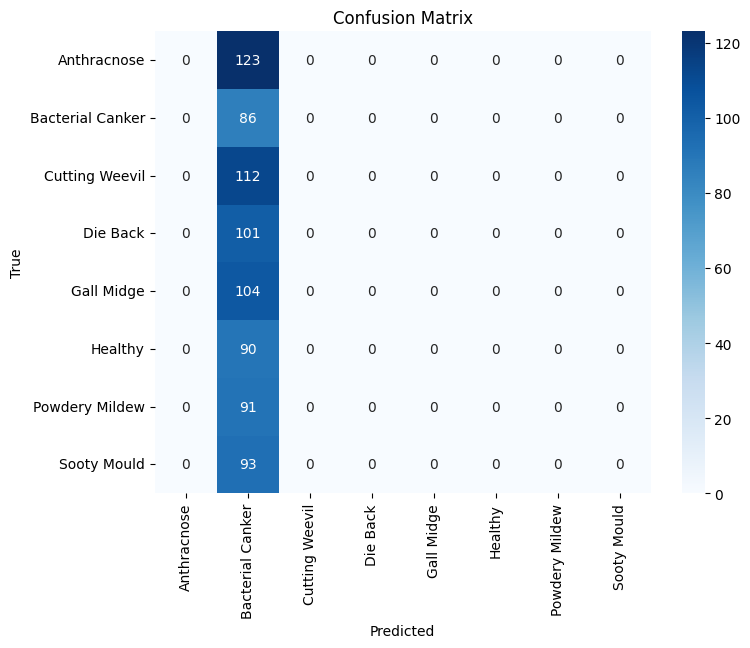

In [45]:
# training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(bpnn6.history['loss'], label='Training Loss')
plt.plot(bpnn6.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(bpnn6.history['accuracy'], label='Training Accuracy')
plt.plot(bpnn6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

predictions = model6.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

class_names = [
    "Anthracnose",
    "Bacterial Canker",
    "Cutting Weevil",
    "Die Back",
    "Gall Midge",
    "Healthy",
    "Powdery Mildew",
    "Sooty Mould"
]

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [51]:
test_labels_one_hot6 = to_categorical(test_labels, num_classes)

predicted_probabilities6 = model6.predict(test_images)

roc_curves6 = []
auc_scores6 = []

for class_index in range(num_classes):
    fpr, tpr, _ = roc_curve(test_labels_one_hot6[:, class_index], predicted_probabilities6[:, class_index])
    roc_curves6.append((fpr, tpr))
    auc_scores6.append(auc(fpr, tpr))

25/25 [==============================] - 0s 3ms/step


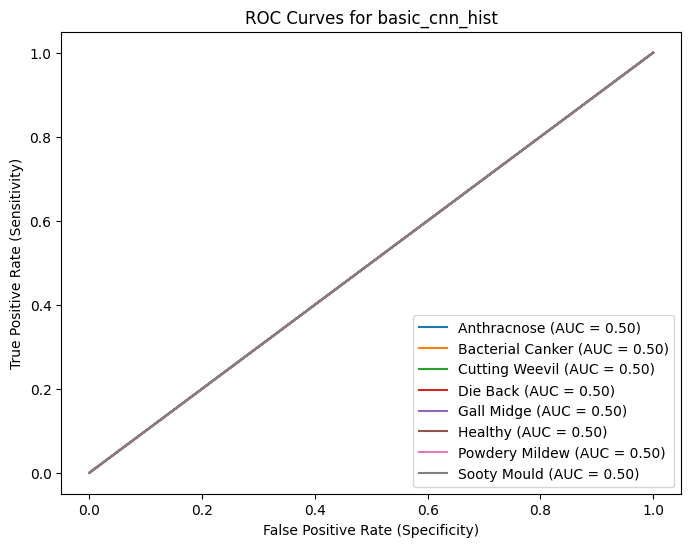

In [52]:
plt.figure(figsize=(8, 6))

for class_index in range(num_classes):
    fpr, tpr = roc_curves6[class_index]
    auc_score6 = auc(fpr, tpr)

    label = f'{class_names[class_index]} (AUC = {auc_score6:.2f})'

    plt.plot(fpr, tpr, label=label)

plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves for basic_cnn_hist')
plt.legend(loc='lower right')

plt.show()

In [53]:
y_true6 = test_labels  # True labels
y_pred6 = predicted_probabilities6.argmax(axis=1)  # Predicted labels

accuracy6 = accuracy_score(y_true6, y_pred6)
print(f'Accuracy: {accuracy6:.2f}')

precision6 = precision_score(y_true6, y_pred6, average='macro')
recall6 = recall_score(y_true6, y_pred6, average='macro')
f1_6 = f1_score(y_true6, y_pred6, average='macro')

print(f'Precision: {precision6:.2f}')
print(f'Recall: {recall6:.2f}')
print(f'F1-Score: {f1_6:.2f}')

Accuracy: 0.11
Precision: 0.01
Recall: 0.12
F1-Score: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


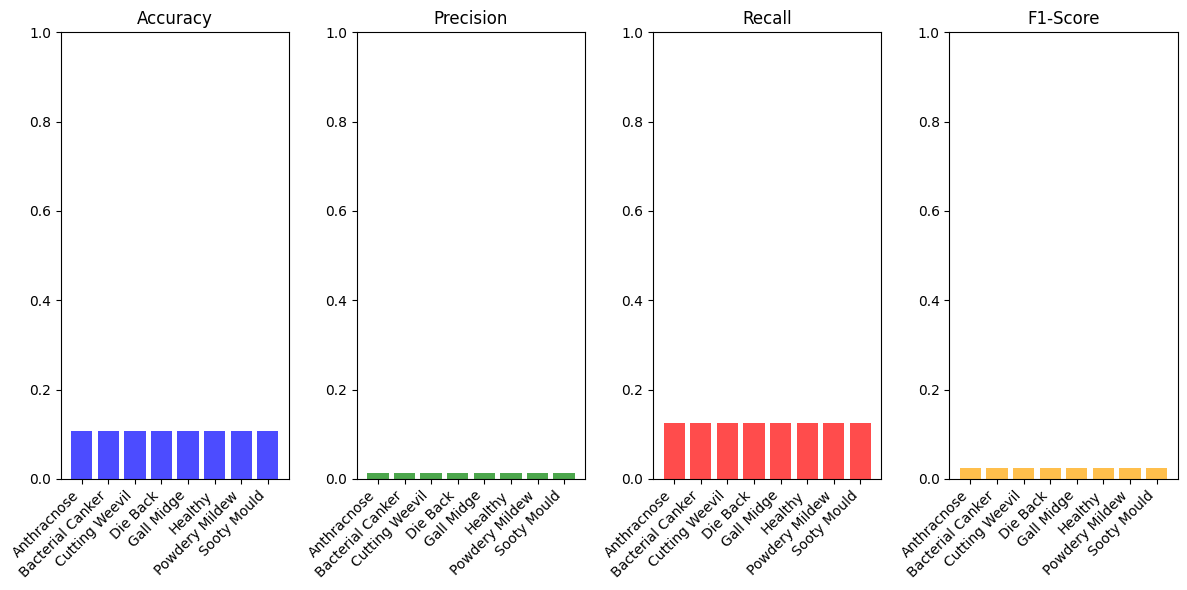

In [54]:
# metric values
accuracy_values = [accuracy6]
precision_values = [precision6]
recall_values = [recall6]
f1_values = [f1_6]

# bar plots for accuracy, precision, recall, and F1-score
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.bar(class_names, accuracy_values, color='b', alpha=0.7)
plt.ylim([0, 1])
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 2)
plt.bar(class_names, precision_values, color='g', alpha=0.7)
plt.ylim([0, 1])
plt.title('Precision')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 3)
plt.bar(class_names, recall_values, color='r', alpha=0.7)
plt.ylim([0, 1])
plt.title('Recall')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 4)
plt.bar(class_names, f1_values, color='orange', alpha=0.7)
plt.ylim([0, 1])
plt.title('F1-Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [43]:

custom_learning_rate = 0.001

model7 = Sequential()
model7.add(Flatten(input_shape=(image_height, image_width, num_channels)))
model7.add(Dense(32, activation='relu'))
model7.add(Dropout(0.25))
model7.add(Dense(64, activation='relu'))
model7.add(Dropout(0.25))
model7.add(Dense(128, activation='relu'))
model7.add(Dropout(0.25))
model7.add(Dense(128, activation='relu'))
model7.add(Dropout(0.5))
model7.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(learning_rate=custom_learning_rate)

model7.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

class PrintAccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy') * 100
        print(f'Epoch {epoch + 1}, Accuracy: {accuracy:.2f}%')

callbacks = [PrintAccuracyCallback()]

model7.summary()

bpnn7 = model7.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, callbacks=callbacks)

test_loss, test_accuracy = model7.evaluate(test_images, test_labels)
print(f'Test accuracy for model7: {test_accuracy * 100:.2f}%')


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_29 (Dense)            (None, 32)                4816928   
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 64)                2112      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 128)               8320      
                                                                 
 dropout_8 (Dropout)         (None, 128)              

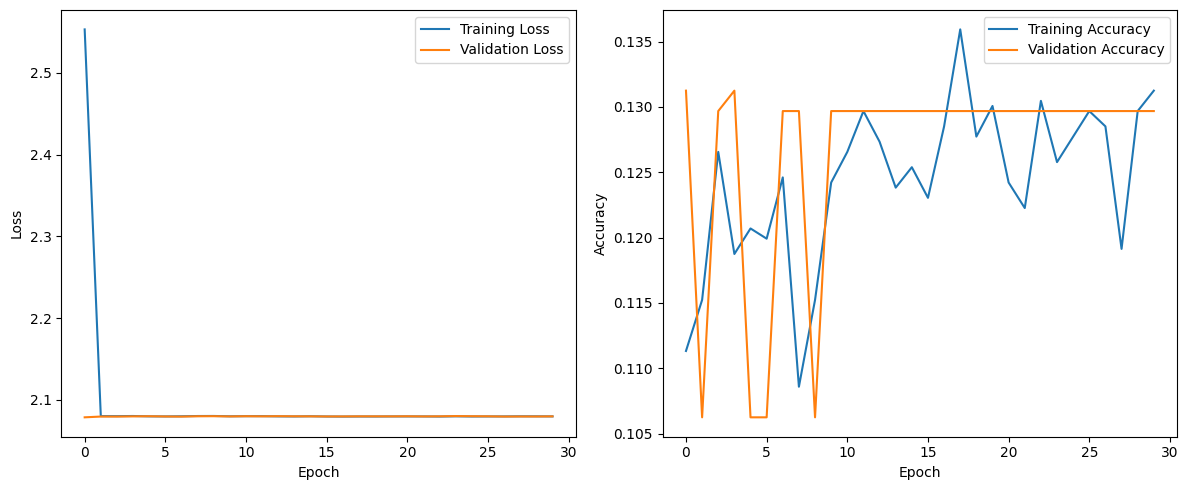

25/25 [==============================] - 0s 6ms/step


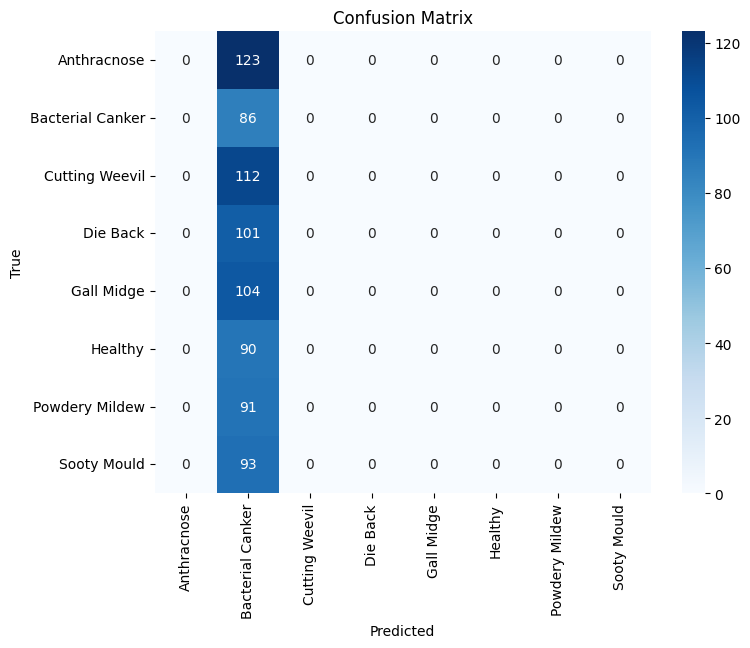

In [46]:
# training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(bpnn7.history['loss'], label='Training Loss')
plt.plot(bpnn7.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(bpnn7.history['accuracy'], label='Training Accuracy')
plt.plot(bpnn7.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

predictions = model7.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

class_names = [
    "Anthracnose",
    "Bacterial Canker",
    "Cutting Weevil",
    "Die Back",
    "Gall Midge",
    "Healthy",
    "Powdery Mildew",
    "Sooty Mould"
]

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [47]:
test_labels_one_hot7 = to_categorical(test_labels, num_classes)

predicted_probabilities7 = model7.predict(test_images)

roc_curves7 = []
auc_scores7 = []

for class_index in range(num_classes):
    fpr, tpr, _ = roc_curve(test_labels_one_hot[:, class_index], predicted_probabilities7[:, class_index])
    roc_curves7.append((fpr, tpr))
    auc_scores7.append(auc(fpr, tpr))

25/25 [==============================] - 0s 3ms/step


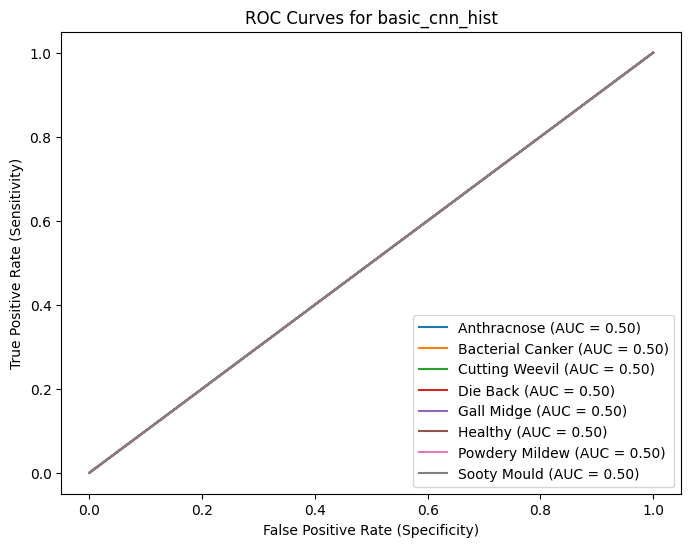

In [48]:
plt.figure(figsize=(8, 6))

for class_index in range(num_classes):
    fpr, tpr = roc_curves7[class_index]
    auc_score7 = auc(fpr, tpr)

    label = f'{class_names[class_index]} (AUC = {auc_score7:.2f})'

    plt.plot(fpr, tpr, label=label)

plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves for basic_cnn_hist')
plt.legend(loc='lower right')

plt.show()

In [49]:
y_true7 = test_labels  # True labels
y_pred7 = predicted_probabilities7.argmax(axis=1)  # Predicted labels

accuracy7 = accuracy_score(y_true7, y_pred7)
print(f'Accuracy: {accuracy7:.2f}')

precision7 = precision_score(y_true7, y_pred7, average='macro')
recall7 = recall_score(y_true7, y_pred7, average='macro')
f1_7 = f1_score(y_true7, y_pred7, average='macro')

print(f'Precision: {precision7:.2f}')
print(f'Recall: {recall7:.2f}')
print(f'F1-Score: {f1_7:.2f}')

Accuracy: 0.11
Precision: 0.01
Recall: 0.12
F1-Score: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


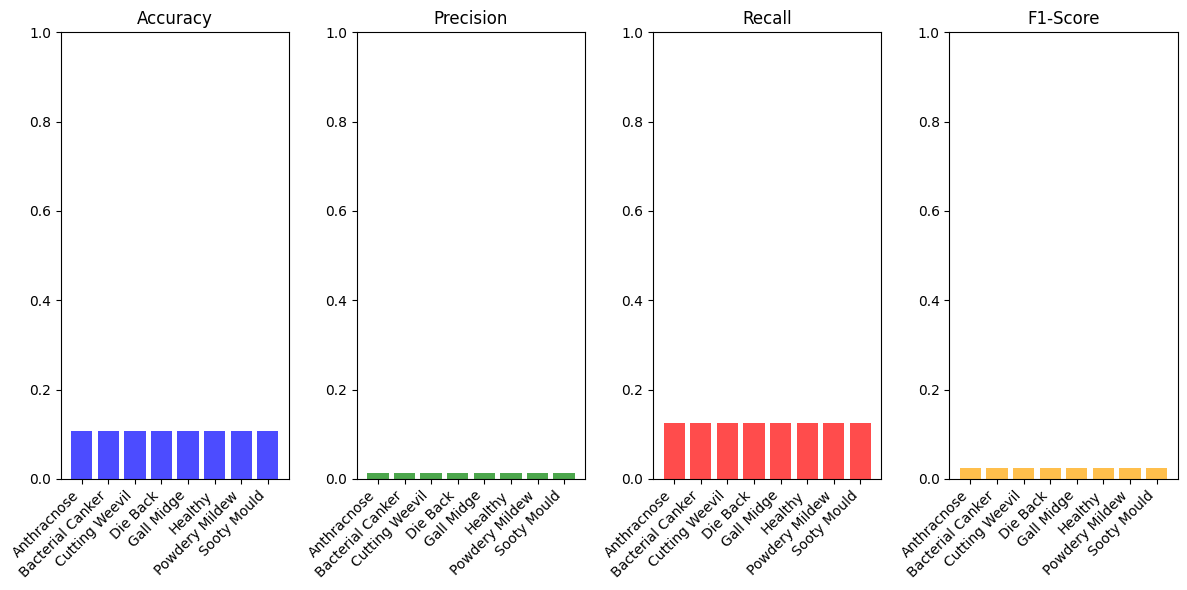

In [50]:
# metric values
accuracy_values = [accuracy7]
precision_values = [precision7]
recall_values = [recall7]
f1_values = [f1_7]

# bar plots for accuracy, precision, recall, and F1-score
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.bar(class_names, accuracy_values, color='b', alpha=0.7)
plt.ylim([0, 1])
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 2)
plt.bar(class_names, precision_values, color='g', alpha=0.7)
plt.ylim([0, 1])
plt.title('Precision')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 3)
plt.bar(class_names, recall_values, color='r', alpha=0.7)
plt.ylim([0, 1])
plt.title('Recall')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 4)
plt.bar(class_names, f1_values, color='orange', alpha=0.7)
plt.ylim([0, 1])
plt.title('F1-Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()